  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

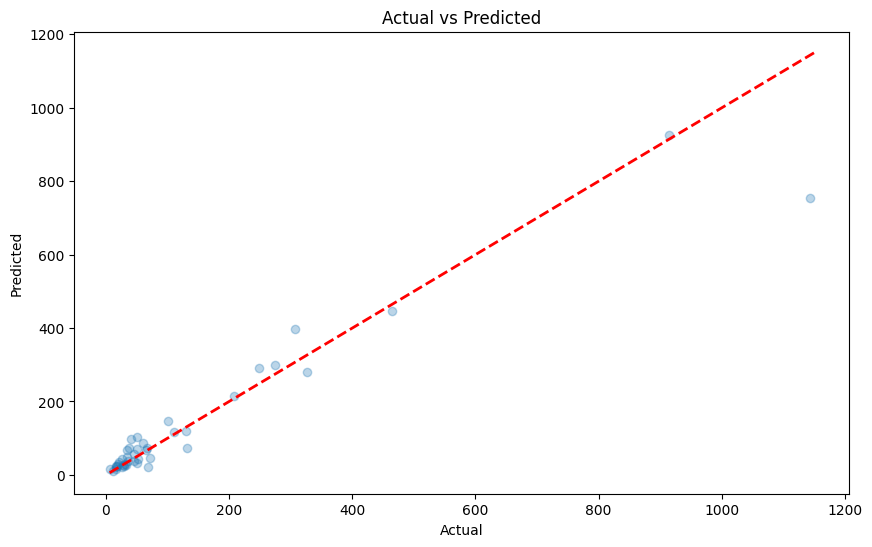

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# 데이터 로드
data = pd.read_csv("machine.data_update.csv")

# 데이터 탐색
print(data.head())
print(data.info())
print(data.describe())

# 모든 열을 수치형으로 변환
data = data.apply(pd.to_numeric, errors='coerce')

# 결측치 처리
data.fillna(data.mean(), inplace=True)

# 데이터 타입 확인
print(data.dtypes)

data = data.drop('VendorName', axis=1)

# 수치형 변수와 범주형 변수 구분
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# 'PRP'는 목표 변수이므로 제거
numeric_features.remove('PRP')

# 수치형 변수 전처리
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 범주형 변수 전처리
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 전처리 파이프라인 구성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 특성과 목표 변수 분리
X = data.drop('PRP', axis=1)
y = data['PRP']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프라인
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# 모델 훈련
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# 하이퍼파라미터 튜닝
param_grid = {
    'model': [RandomForestRegressor(), GradientBoostingRegressor()],
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20]
}

# 그리드 서치
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# 교차 검증
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

# 예측
y_pred = grid_search.best_estimator_.predict(X_test)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

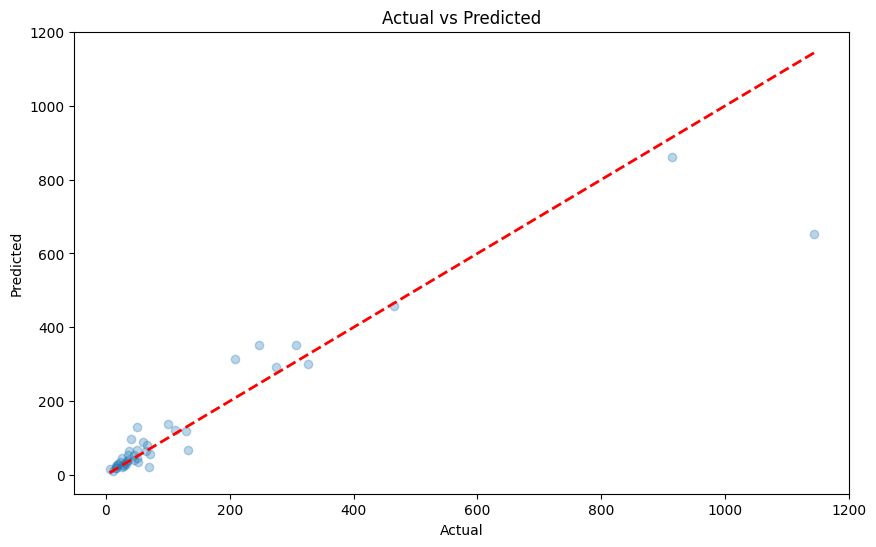

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# 데이터 로드
data = pd.read_csv("machine.data_update.csv")

# 데이터 탐색
print(data.head())
print(data.info())
print(data.describe())

# 모든 열을 수치형으로 변환
data = data.apply(pd.to_numeric, errors='coerce')

# 결측치 처리
data.fillna(data.mean(), inplace=True)

# 데이터 타입 확인
print(data.dtypes)

# 'VendorName' 열 삭제
data = data.drop('VendorName', axis=1)

# 필요한 피처와 타겟 변수 분리
features = data[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']]
target = data['PRP']

# 수치형 변수 전처리
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 전처리 파이프라인 구성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features.columns)
    ])

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 파이프라인
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# 모델 훈련
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# 하이퍼파라미터 튜닝
param_grid = {
    'model': [RandomForestRegressor(), GradientBoostingRegressor()],
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20]
}

# 그리드 서치
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# 교차 검증
cv_scores = cross_val_score(grid_search.best_estimator_, features, target, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

# 학습 데이터와 테스트 데이터 각각에 대해 최적 모델 평가
best_model = grid_search.best_estimator_

# 학습 데이터 평가
y_train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Train Mean Squared Error:", train_mse)
print("Train Mean Absolute Error:", train_mae)
print("Train R2 Score:", train_r2)

# 테스트 데이터 평가
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Mean Squared Error:", test_mse)
print("Test Mean Absolute Error:", test_mae)
print("Test R2 Score:", test_r2)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

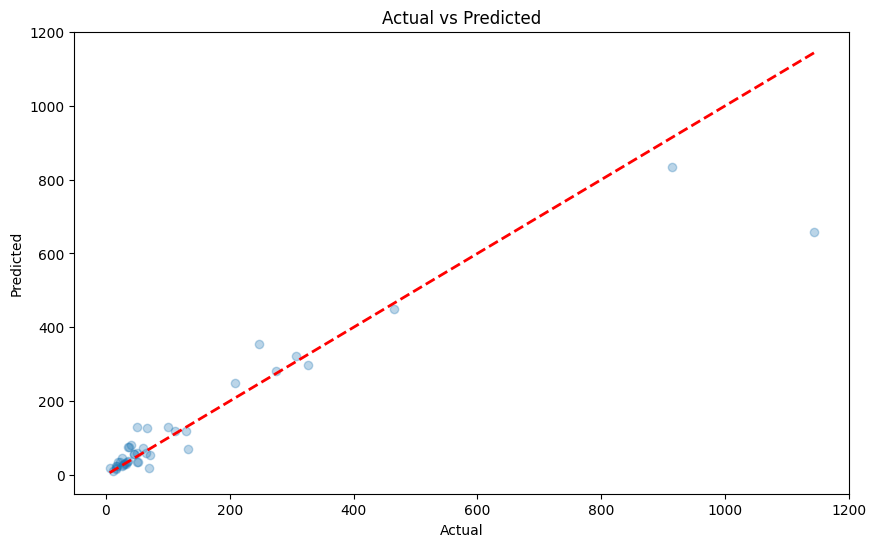

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# 데이터 로드
data = pd.read_csv("machine.data_update.csv")

# 데이터 탐색
print(data.head())
print(data.info())
print(data.describe())

# 모든 열을 수치형으로 변환
data = data.apply(pd.to_numeric, errors='coerce')

# 결측치 처리
data.fillna(data.mean(), inplace=True)

# 데이터 타입 확인
print(data.dtypes)

# 'VendorName' 열 삭제
data = data.drop('VendorName', axis=1)

# 필요한 피처와 타겟 변수 분리
features = data[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']]
target = data['PRP']

# 수치형 변수 전처리
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# 전처리 파이프라인 구성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features.columns)
    ])

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 파이프라인 랜덤포레스트 모델 사용
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# 하이퍼파라미터 튜닝
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# 그리드 서치
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# 학습 데이터와 테스트 데이터 각각에 대해 최적 모델 평가
best_model = grid_search.best_estimator_

# 학습 데이터 평가
y_train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Train Mean Squared Error:", train_mse)
print("Train Mean Absolute Error:", train_mae)
print("Train R2 Score:", train_r2)

# 테스트 데이터 평가
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Mean Squared Error:", test_mse)
print("Test Mean Absolute Error:", test_mae)
print("Test R2 Score:", test_r2)

# 교차 검증
cv_scores = cross_val_score(best_model, features, target, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

                                   Train MSE  Train MAE  Train R^2  \
Model                                                                
Linear Regression                3117.658905  35.122006   0.837828   
Random Forest/Gradient Boosting   676.501545  11.455697   0.964810   

                                    Test MSE   Test MAE  Test R^2    CV MSE  
Model                                                                        
Linear Regression                5633.068156  48.068801  0.889346 -0.616234  
Random Forest/Gradient Boosting  6909.248652  33.675875  0.864277  0.756558  


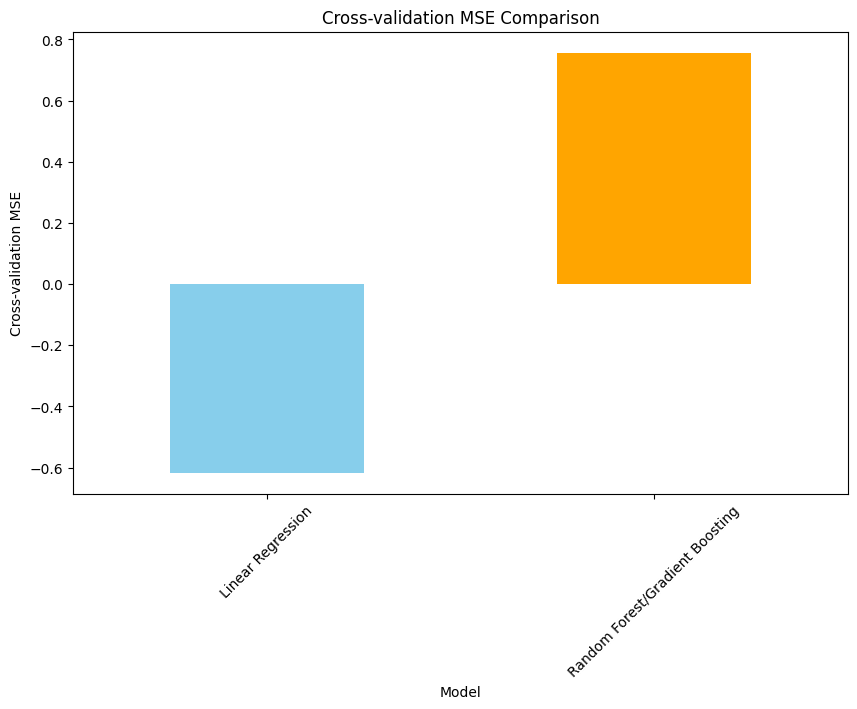

<Figure size 1000x600 with 0 Axes>

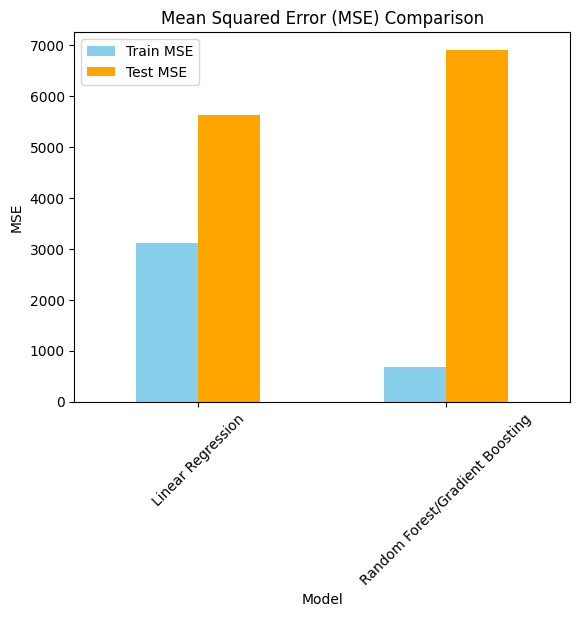

<Figure size 1000x600 with 0 Axes>

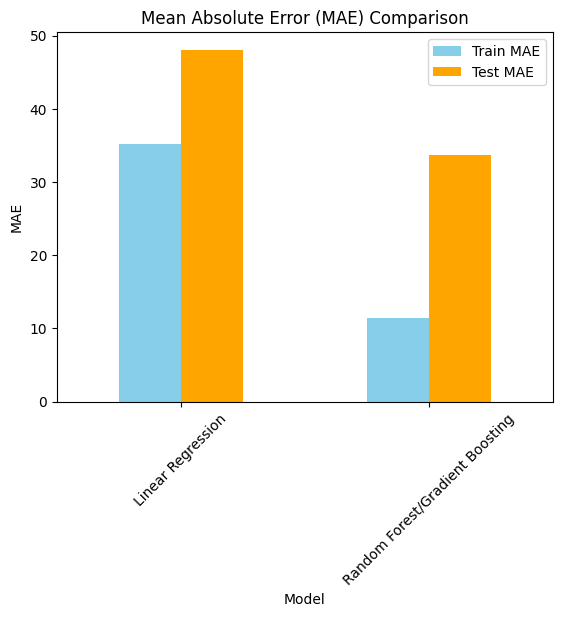

<Figure size 1000x600 with 0 Axes>

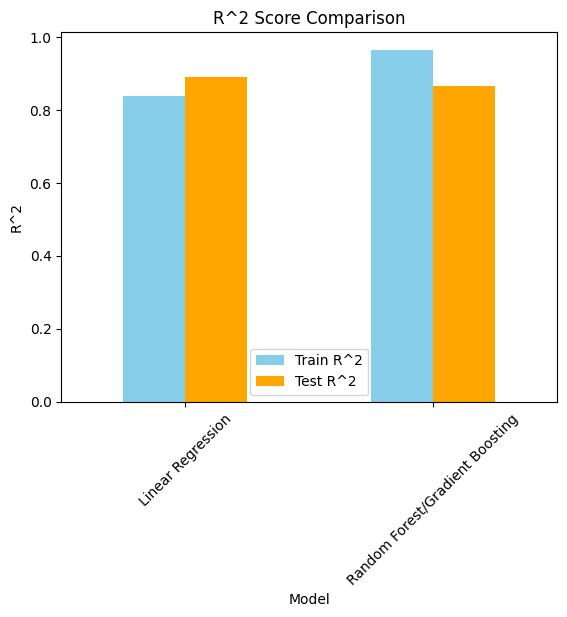

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1번 Linear Regression 성능 지표
linear_regression_results = {
    'Model': 'Linear Regression',
    'Train MSE': 3117.658905430177,
    'Train MAE': 35.12200634651682,
    'Train R^2': 0.8378284557995717,
    'Test MSE': 5633.068155793262,
    'Test MAE': 48.06880134700473,
    'Test R^2': 0.8893455830696774,
    'CV MSE': -0.6162337806164521
}

# 2번 Pipeline 성능 지표
pipeline_results = {
    'Model': 'Random Forest/Gradient Boosting',
    'Train MSE': 676.5015452222759,
    'Train MAE': 11.455697119298364,
    'Train R^2': 0.9648103581659987,
    'Test MSE': 6909.24865236006,
    'Test MAE': 33.67587539791093,
    'Test R^2': 0.8642766499696548,
    'CV MSE': 0.756558256314406
}

# 데이터프레임에 저장
results_df = pd.DataFrame([linear_regression_results, pipeline_results])
results_df.set_index('Model', inplace=True)
print(results_df)

# 교차 검증 시각화
plt.figure(figsize=(10, 6))
results_df['CV MSE'].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Cross-validation MSE Comparison')
plt.ylabel('Cross-validation MSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# MSE 시각화
plt.figure(figsize=(10, 6))
results_df[['Train MSE', 'Test MSE']].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# MAE 시각화
plt.figure(figsize=(10, 6))
results_df[['Train MAE', 'Test MAE']].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# R^2 시각화
plt.figure(figsize=(10, 6))
results_df[['Train R^2', 'Test R^2']].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('R^2 Score Comparison')
plt.ylabel('R^2')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()